<a href="https://colab.research.google.com/github/aravindchakravarti/Deep_Learning_EVA_4/blob/master/S9_Cifar_ResNet_Albumentations/S9_Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
!rm *.py
!cp -a './gdrive/My Drive/EVA4_Libraries/.' '/content/'

rm: cannot remove '*.py': No such file or directory
cp: cannot open './gdrive/My Drive/EVA4_Libraries/./data.gdoc' for reading: Operation not supported


In [0]:
# to autoreload all the custom files when modified
import autoreload
%load_ext autoreload
%autoreload 2

from DatasetLoader import getCifar10Data, cifar10WithAlbumentations
from CNNModel import displayModelSummary, isCudaAvailable, plainArch, ResNet18
from CNNTrainTest import train, test
from selectOptimizer import setupOptimizer
from runningModel import runTheModel

!pip install torchsummary

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [0]:
train_loader, test_loader = cifar10WithAlbumentations(batch_size = 512)

Building up with Albumentations - 1v3
Now downloading and allocating dataset
Cuda Available? True


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified
Now allocating Dataloaders


In [0]:
device = isCudaAvailable()

print (device)

cuda


In [0]:
model = ResNet18().to(device)

[autoreload of gradCam failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
RecursionError: maximum recursion depth exceeded
]


In [0]:
optimizer = setupOptimizer(model, device, optimzer_select='NLLLoss')

In [0]:
displayModelSummary(model)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

/content/CNNModel.py:183: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)


In [0]:
runTheModel(model=model, device=device, optimizer=optimizer, train_loader=train_loader, test_loader=test_loader, train=train, test=test, epochs = 25)

In [0]:
import torch
torch.save(model, 'entire_model.pth')

In [0]:
runTheModel(model=model, device=device, optimizer=optimizer, train_loader=train_loader, test_loader=test_loader, train=train, test=test, epochs = 10)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


/content/CNNModel.py:183: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=0.4999063014984131 Batch_id=97 Accuracy=83.55: 100%|██████████| 98/98 [03:12<00:00,  1.77s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5145, Accuracy: 8262/10000 (82.62%)

EPOCH: 1


Loss=0.4531996250152588 Batch_id=97 Accuracy=84.36: 100%|██████████| 98/98 [03:12<00:00,  1.76s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4581, Accuracy: 8441/10000 (84.41%)

EPOCH: 2


Loss=0.39949095249176025 Batch_id=97 Accuracy=84.42: 100%|██████████| 98/98 [03:11<00:00,  1.76s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5198, Accuracy: 8299/10000 (82.99%)

EPOCH: 3


Loss=0.3922984302043915 Batch_id=97 Accuracy=85.14: 100%|██████████| 98/98 [03:11<00:00,  1.76s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4787, Accuracy: 8435/10000 (84.35%)

EPOCH: 4


Loss=0.469422847032547 Batch_id=97 Accuracy=85.41: 100%|██████████| 98/98 [03:11<00:00,  1.76s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5117, Accuracy: 8358/10000 (83.58%)

EPOCH: 5


Loss=0.4558686316013336 Batch_id=97 Accuracy=85.51: 100%|██████████| 98/98 [03:11<00:00,  1.77s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5312, Accuracy: 8289/10000 (82.89%)

EPOCH: 6


Loss=0.34179243445396423 Batch_id=97 Accuracy=85.80: 100%|██████████| 98/98 [03:11<00:00,  1.76s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4638, Accuracy: 8466/10000 (84.66%)

EPOCH: 7


Loss=0.3310687839984894 Batch_id=97 Accuracy=86.16: 100%|██████████| 98/98 [03:11<00:00,  1.76s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4723, Accuracy: 8431/10000 (84.31%)

EPOCH: 8


Loss=0.44847869873046875 Batch_id=97 Accuracy=86.59: 100%|██████████| 98/98 [03:11<00:00,  1.76s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4808, Accuracy: 8453/10000 (84.53%)

EPOCH: 9


Loss=0.3661690950393677 Batch_id=97 Accuracy=86.75: 100%|██████████| 98/98 [03:10<00:00,  1.75s/it]



Test set: Average loss: 0.4623, Accuracy: 8469/10000 (84.69%)



In [0]:
import torch
torch.save(model, './gdrive/My Drive/EVA4_Libraries/entire_model_2.pth')

In [0]:
runTheModel(model=model, device=device, optimizer=optimizer, train_loader=train_loader, test_loader=test_loader, train=train, test=test, epochs = 10)

  0%|          | 0/98 [00:00<?, ?it/s]

EPOCH: 0


/content/CNNModel.py:183: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(out)
Loss=0.3660433292388916 Batch_id=97 Accuracy=86.97: 100%|██████████| 98/98 [03:10<00:00,  1.75s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.6272, Accuracy: 8130/10000 (81.30%)

EPOCH: 1


Loss=0.31600499153137207 Batch_id=97 Accuracy=87.26: 100%|██████████| 98/98 [03:10<00:00,  1.75s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4262, Accuracy: 8619/10000 (86.19%)

EPOCH: 2


Loss=0.3880158066749573 Batch_id=97 Accuracy=87.36: 100%|██████████| 98/98 [03:10<00:00,  1.75s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4424, Accuracy: 8591/10000 (85.91%)

EPOCH: 3


Loss=0.2911946773529053 Batch_id=97 Accuracy=87.59: 100%|██████████| 98/98 [03:10<00:00,  1.75s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.5097, Accuracy: 8346/10000 (83.46%)

EPOCH: 4


  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4664, Accuracy: 8465/10000 (84.65%)

EPOCH: 5


Loss=0.3825851082801819 Batch_id=97 Accuracy=88.01: 100%|██████████| 98/98 [03:10<00:00,  1.75s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4392, Accuracy: 8608/10000 (86.08%)

EPOCH: 6


Loss=0.3402818739414215 Batch_id=97 Accuracy=88.46: 100%|██████████| 98/98 [03:10<00:00,  1.75s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4509, Accuracy: 8595/10000 (85.95%)

EPOCH: 7


Loss=0.37694603204727173 Batch_id=97 Accuracy=88.74: 100%|██████████| 98/98 [03:10<00:00,  1.75s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4588, Accuracy: 8599/10000 (85.99%)

EPOCH: 8


Loss=0.30852723121643066 Batch_id=97 Accuracy=88.81: 100%|██████████| 98/98 [03:10<00:00,  1.75s/it]
  0%|          | 0/98 [00:00<?, ?it/s]


Test set: Average loss: 0.4823, Accuracy: 8508/10000 (85.08%)

EPOCH: 9


Loss=0.3297480046749115 Batch_id=97 Accuracy=88.94: 100%|██████████| 98/98 [03:10<00:00,  1.75s/it]



Test set: Average loss: 0.5091, Accuracy: 8401/10000 (84.01%)



In [0]:
torch.save(model, './gdrive/My Drive/EVA4_Libraries/entire_model_3.pth')

# Let us load the model for building GradCam 

In [0]:
import torch
model = torch.load('entire_model_3.pth')

In [0]:
for test_images, test_labels in test_loader:  
    sample_image = test_images[0]    # Reshape them according to your needs.
    sample_label = test_labels[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


truck


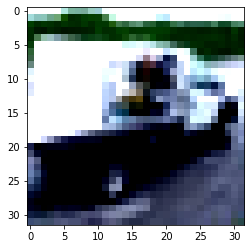

In [0]:
import matplotlib.pyplot as plt
import numpy as np

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

sample_image = sample_image / 2 + 0.5     # unnormalize
npimg = sample_image.numpy()
plt.imshow(np.transpose(npimg, (1, 2, 0)))
print (classes[sample_label])

In [0]:
%autoreload 2
from gradCam import showGradCamImage

[autoreload of gradCam failed: Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/IPython/extensions/autoreload.py", line 247, in check
    superreload(m, reload, self.old_objects)
RecursionError: maximum recursion depth exceeded
]


In [0]:
showGradCamImage(model = model, img = sample_image, use_cuda=True)

Welcome to GradCam V1.0


AttributeError: ignored